**Import Library**

In [ ]:
# Install rasterio jika belum ada (hanya perlu dijalankan sekali di awal)
!pip install rasterio


In [ ]:
# Import semua library yang diperlukan
import rasterio                    # Untuk membaca file raster (GeoTIFF)
import pandas as pd               # Untuk manipulasi dan penyimpanan data tabular
import matplotlib.pyplot as plt   # Untuk visualisasi grafik/matrix citra
import numpy as np                # Untuk operasi array numerik
from scipy.ndimage import median_filter  # Untuk filtering noise opsional


**Input Data**

In [ ]:
# Lokasi file GeoTIFF di Google Drive
file_path = '/content/drive/MyDrive/Pelatihan Machine Learning/Pelatihan 1/Day 3/Data/Landsat_8_DKI_JAKPUS_2017/landsat8_dki_jakpus_2017.tif'


**Data Exploratory**

**Melihat jumlah dan deskrispi tiap band**

In [ ]:
# Buka file GeoTIFF dan tampilkan informasi dasar
with rasterio.open(file_path) as src:
    print("Jumlah band:", src.count)                     # Berapa band (layer) dalam citra
    print("Ukuran citra (baris x kolom):", src.height, "x", src.width)  # Resolusi
    print("Deskripsi band:", src.descriptions)           # Deskripsi band (jika ada)
    print("Tipe data band:", src.dtypes)                 # Jenis data per band (misal uint16)
    print("Metadata umum:", src.tags())                  # Metadata umum (nama file, software, dll)
    print("Metadata Band 1:", src.tags(1))               # Metadata khusus band ke-1


Jumlah band: 19
Ukuran citra (baris x kolom): 349 x 334
Deskripsi band: ('SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'SR_QA_AEROSOL', 'ST_B10', 'ST_ATRAN', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA', 'ST_TRAD', 'ST_URAD', 'QA_PIXEL', 'QA_RADSAT')
Tipe data band: ('float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64')
Metadata umum: {'AREA_OR_POINT': 'Area'}
Metadata Band 1: {}


**Visualisasi Band**

In [ ]:
# Membaca data band 1, 2, dan 3
with rasterio.open(file_path) as src:
    print("Jumlah band:", src.count)
    print("Ukuran citra (baris x kolom):", src.height, "x", src.width)

    band1 = src.read(1)   # Misal: Blue
    band2 = src.read(2)   # Misal: Green
    band3 = src.read(3)   # Misal: Red


Jumlah band: 19
Ukuran citra (baris x kolom): 349 x 334


**Menampilkan Citra Band 1**

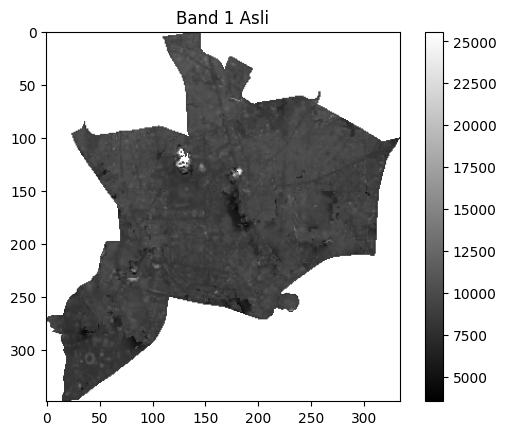

In [ ]:
# Tampilkan citra band 1 asli
plt.imshow(band1, cmap='gray')
plt.title('Band 1 Asli')
plt.colorbar()
plt.show()


**Menampilkan Citra Band 2**

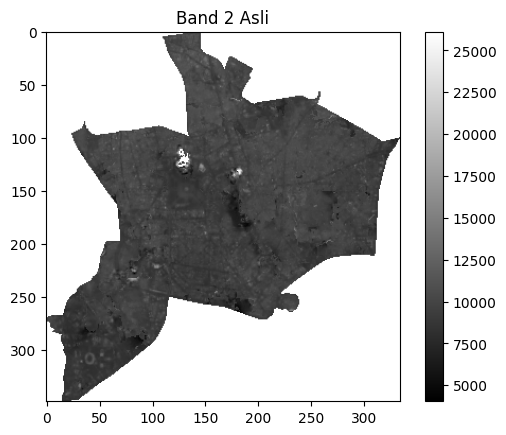

In [ ]:
# Tampilkan citra band 2 asli
plt.imshow(band2, cmap='gray')
plt.title('Band 2 Asli')
plt.colorbar()
plt.show()


**Menampilkan Citra Band 3**

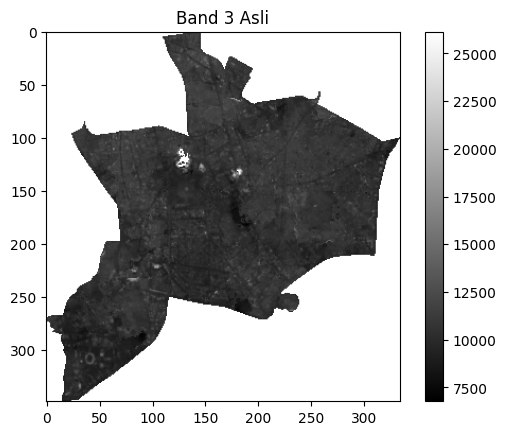

In [ ]:
# Tampilkan citra band 3 asli
plt.imshow(band3, cmap='gray')
plt.title('Band 3 Asli')
plt.colorbar()
plt.show()


**Visualisasi data**

In [ ]:
# Flatten array jadi 1 dimensi
flat_band1 = band1.flatten()

# Buat DataFrame 1 kolom
df_flat_band1 = pd.DataFrame(flat_band1, columns=['Band1_pixel_value'])

print(df_flat_band1.head(20))  # lihat 20 piksel pertama



**Melihat dan Menyimpan data ke csv**

In [ ]:
import pandas as pd

# Buat DataFrame dari band1 (2D array)
df_band1 = pd.DataFrame(band1)

# Tampilkan 10 baris pertama dan 10 kolom pertama
print(df_band1.iloc[:10, :10])
#selanjutnya save hasil
df_band1.to_csv('/content/drive/MyDrive/Pelatihan Machine Learning/Pelatihan 1/Day 3/Result/band1_data.csv', index=False)
print("Data band 1 sudah disimpan ke band1_data.csv")



    0   1   2   3   4   5   6   7   8   9
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
5 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
6 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
7 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
8 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
Data band 1 sudah disimpan ke band1_data.csv
